In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'hackathon:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4465369%2F7658513%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240219%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240219T231218Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8ada01f7400603e02216224188adff046c38ea4f274a555421d8e726b6a79d074361b99f544f5987981af01087599cb9490bf4208ca2a75e89b3fe86622e464c44cd55d474a048a912527dd36a5d266b3487093184792658a77772bd85ccc64fd779f90e8d5ad1ec61644996e640d1f18b96a25e5f77f083f2490310409da69b75ee6e54f000a91bdf31fdd82d6ce01b801507da47a9cf895693ad68405b772c44174f5852959b429a7e06dba656dcb01c1cbb6b8650d6f8c9a68480175dbba6864873e02a0e59cda52bbde35d9f01d0681fcebecbed735423e932637253a0828a7279cb1bc85b9de02ab1b18be1ee10bc2c5a013b4b608ceaef786b1ddabb47'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 39493948 bytes downloaded
Downloaded and uncompressed: hackathon
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon/entity_schedule.csv
/kaggle/input/hackathon/attendance.csv
/kaggle/input/hackathon/glossary.xlsx
/kaggle/input/hackathon/waiting_times.csv
/kaggle/input/hackathon/weather_data.csv
/kaggle/input/hackathon/link_attraction_park.csv
/kaggle/input/hackathon/parade_night_show.xlsx


In [5]:
waiting_df = pd.read_csv('/kaggle/input/hackathon/waiting_times.csv')
weather_df = pd.read_csv('/kaggle/input/hackathon/weather_data.csv')
attendance_df = pd.read_csv('/kaggle/input/hackathon/attendance.csv')
entity_schedule_df = pd.read_csv('/kaggle/input/hackathon/entity_schedule.csv')
link_df = pd.read_csv('/kaggle/input/hackathon/link_attraction_park.csv')

# Weather Analysis

# Data Cleaning

In [ ]:
weather_df.shape

(207264, 28)

In [ ]:
weather_df.isnull().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility             207264
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              207264
grnd_level             207264
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              207024
rain_1h                178335
rain_3h                207237
snow_1h                206111
snow_3h                207264
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [ ]:
#checking for redundant columns
weather_df.isnull().sum() == 207264

dt                     False
dt_iso                 False
timezone               False
city_name              False
lat                    False
lon                    False
temp                   False
visibility              True
dew_point              False
feels_like             False
temp_min               False
temp_max               False
pressure               False
sea_level               True
grnd_level              True
humidity               False
wind_speed             False
wind_deg               False
wind_gust              False
rain_1h                False
rain_3h                False
snow_1h                False
snow_3h                 True
clouds_all             False
weather_id             False
weather_main           False
weather_description    False
weather_icon           False
dtype: bool

In [ ]:
clean_weather_df = weather_df.drop(columns = ['visibility','sea_level','grnd_level','snow_3h','city_name'],axis =1)

In [ ]:
clean_weather_df.columns

Index(['dt', 'dt_iso', 'timezone', 'lat', 'lon', 'temp', 'dew_point',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [ ]:
# Since number of null values in other columns is also very large , we are going to impute them with 0
clean_weather_df = clean_weather_df.fillna(0)

In [ ]:
clean_weather_df['weather_main'].unique() #Inspecting categorical variables

array(['Clear', 'Clouds', 'Rain', 'Snow'], dtype=object)

In [ ]:
clean_weather_df['weather_description'].unique()

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain', 'light snow',
       'snow', 'heavy intensity rain'], dtype=object)

# **Correlation Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

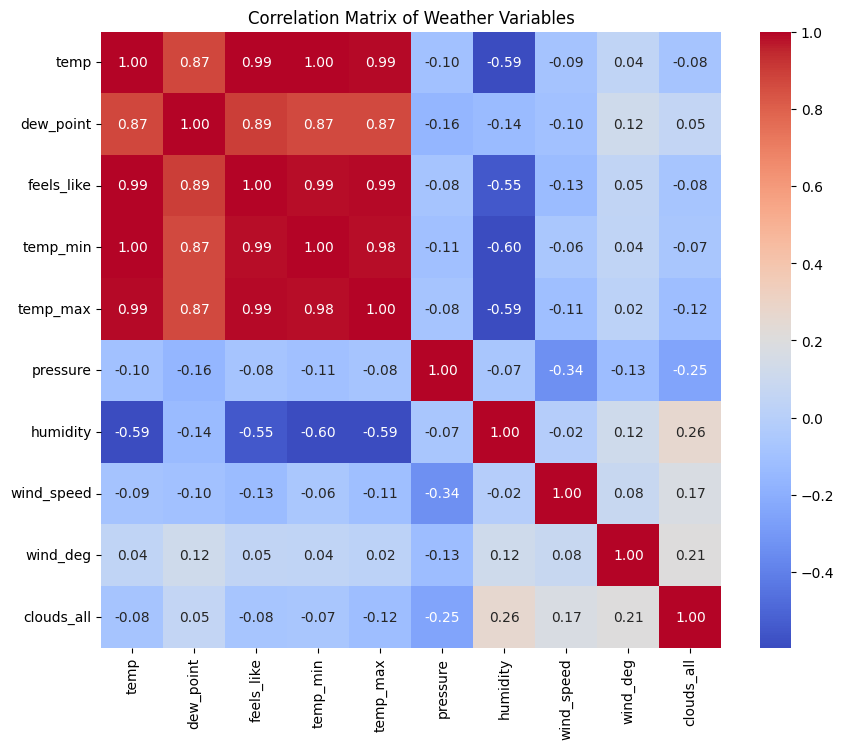

In [ ]:
# Selecting numerical columns for correlation analysis
numerical_columns = ['temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'clouds_all']

# Compute the correlation matrix
corr_matrix = clean_weather_df[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

**High Correlation Between Temperature Variables:** There's a strong positive correlation between temp, dew_point, feels_like, temp_min, and temp_max. This indicates that as the actual air temperature (temp) increases, the feels_like temperature, dew point, and the minimum and maximum temperatures recorded within the hour also tend to increase. This relationship is expected because these variables are all measures of or are directly influenced by the air temperature.

**Temperature and Humidity:** The correlation between temperature variables (temp, dew_point, feels_like) and humidity is relatively low, suggesting that air temperature and humidity levels vary more independently. While there is a relationship between temperature and the capacity of air to hold moisture (dew point), the actual humidity level can be influenced by other factors, such as water sources and air movement.

**Wind Speed and Temperature Variables:** Wind speed (wind_speed) has a very low correlation with temperature variables. This indicates that the wind speed does not directly influence the temperature readings to a significant degree, which is reasonable as wind can affect the perceived temperature (feels_like) but does not directly change the air temperature.

**Pressure and Weather Conditions:** Atmospheric pressure (pressure) shows a low to moderate negative correlation with temperature variables and a slight positive correlation with humidity. This suggests that as pressure decreases, temperatures tend to be higher, which aligns with weather patterns where low-pressure systems are often associated with warmer, more humid weather.

**Cloud Cover (clouds_all) and Temperature:** Cloud cover has a very low correlation with temperature variables, indicating that the extent of cloudiness does not directly predict temperature levels. However, clouds can influence local temperature by trapping heat or providing shade, but this effect may not be directly observable in the correlation with temperature readings.

# Temporal Analysis

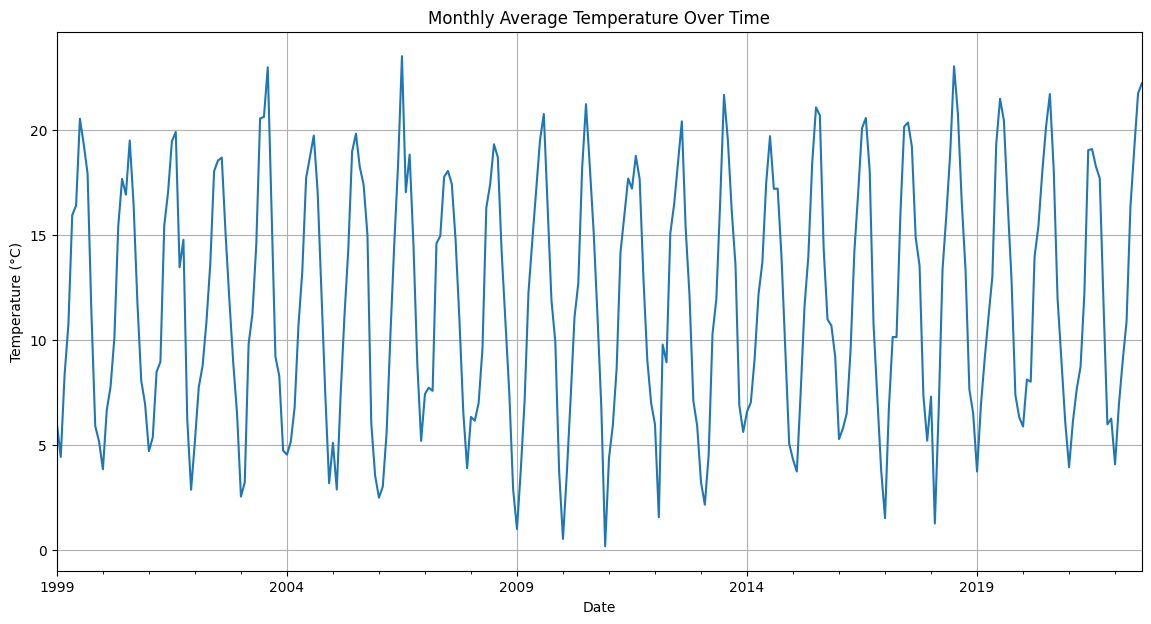

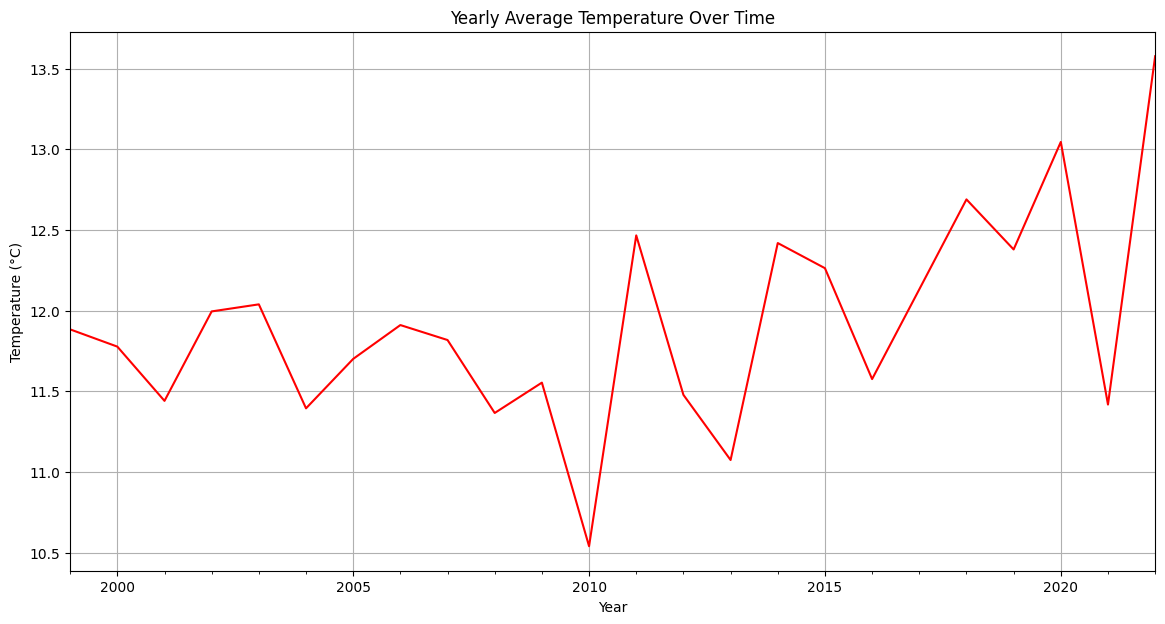

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt


# Convert 'dt_iso' to datetime, removing timezone information for simplicity
clean_weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'].str.slice(start=0, stop=-10), format='%Y-%m-%d %H:%M:%S', utc=True)

# Set 'dt_iso' as the DataFrame index
clean_weather_df.set_index('dt_iso', inplace=True)

# Monthly Average Temperature Trend
# Resample data to compute monthly average temperatures
monthly_temp = clean_weather_df['temp'].resample('M').mean()

# Plot the monthly average temperatures
plt.figure(figsize=(14, 7))
monthly_temp.plot(title='Monthly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Yearly Average Temperature Trend
# Resample data to compute yearly average temperatures
yearly_temp = clean_weather_df['temp'].resample('A').mean()

# Plot the yearly average temperatures
plt.figure(figsize=(14, 7))
yearly_temp.plot(title='Yearly Average Temperature Over Time', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


**Monthly Average Temperature Trends:** The first plot displays the fluctuation of average temperatures on a monthly basis. This graph showcases the cyclical nature of temperature changes, reflecting seasonal variations throughout the years. Peaks generally represent warmer summer months, while troughs correspond to colder winter months, indicating a clear seasonal pattern.

**Yearly Average Temperature Trends:** The second plot, focusing on yearly average temperatures, highlights long-term temperature trends. It offers a broader perspective on how average temperatures have evolved year over year. This can be particularly useful for identifying any gradual increases or decreases in temperature, potentially signaling long-term climatic changes such as global warming or natural variability in weather patterns.

In [ ]:
clean_weather_df.head()

,dt,timezone,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1999-01-01 00:00:00+00:00,915148800,3600,48.873492,2.295104,8.33,3.39,5.28,8.14,9.32,1006,...,152,0.0,0.0,0.0,0.0,8,800,Clear,sky is clear,01n
1999-01-01 01:00:00+00:00,915152400,3600,48.873492,2.295104,8.08,3.54,5.18,7.94,9.32,1006,...,153,0.0,0.0,0.0,0.0,6,800,Clear,sky is clear,01n
1999-01-01 02:00:00+00:00,915156000,3600,48.873492,2.295104,8.08,4.11,5.38,7.94,8.74,1006,...,153,0.0,0.0,0.0,0.0,14,801,Clouds,few clouds,02n
1999-01-01 03:00:00+00:00,915159600,3600,48.873492,2.295104,7.31,3.73,4.42,7.14,8.62,1006,...,154,0.0,0.0,0.0,0.0,39,802,Clouds,scattered clouds,03n
1999-01-01 04:00:00+00:00,915163200,3600,48.873492,2.295104,6.91,3.53,4.00,6.74,8.32,1007,...,159,0.0,0.0,0.0,0.0,52,803,Clouds,broken clouds,04n


# Waiting Time Analysis

# Data Cleaning


In [6]:
# Good news , we dont have any missing values !
waiting_df.isnull().sum()

WORK_DATE                   0
DEB_TIME                    0
DEB_TIME_HOUR               0
FIN_TIME                    0
ENTITY_DESCRIPTION_SHORT    0
WAIT_TIME_MAX               0
NB_UNITS                    0
GUEST_CARRIED               0
CAPACITY                    0
ADJUST_CAPACITY             0
OPEN_TIME                   0
UP_TIME                     0
DOWNTIME                    0
NB_MAX_UNIT                 0
dtype: int64

In [7]:
waiting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509324 entries, 0 to 3509323
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   WORK_DATE                 object 
 1   DEB_TIME                  object 
 2   DEB_TIME_HOUR             int64  
 3   FIN_TIME                  object 
 4   ENTITY_DESCRIPTION_SHORT  object 
 5   WAIT_TIME_MAX             int64  
 6   NB_UNITS                  float64
 7   GUEST_CARRIED             float64
 8   CAPACITY                  float64
 9   ADJUST_CAPACITY           float64
 10  OPEN_TIME                 int64  
 11  UP_TIME                   int64  
 12  DOWNTIME                  int64  
 13  NB_MAX_UNIT               float64
dtypes: float64(5), int64(5), object(4)
memory usage: 374.8+ MB


In [8]:
waiting_df.describe()

,DEB_TIME_HOUR,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
count,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06,3.509324e+06
mean,1.549995e+01,1.356083e+01,1.271980e+01,7.526034e+01,1.641373e+02,1.429673e+02,7.938917e+00,7.646112e+00,2.928051e-01,1.979631e+01
std,4.031111e+00,2.103223e+01,2.286562e+01,1.063368e+02,1.948027e+02,1.778541e+02,7.449887e+00,7.431283e+00,1.958422e+00,2.816274e+01
min,9.000000e+00,0.000000e+00,-1.000000e+00,-4.780000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00
25%,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,1.500000e+01,5.000000e+00,4.000000e+00,1.100000e+01,1.012500e+02,7.500000e+01,1.500000e+01,1.300000e+01,0.000000e+00,1.100000e+01
75%,1.900000e+01,2.000000e+01,1.600000e+01,1.300000e+02,2.882500e+02,2.437500e+02,1.500000e+01,1.500000e+01,0.000000e+00,2.000000e+01
max,2.200000e+01,3.000000e+02,1.300000e+02,1.500000e+04,7.560000e+02,7.560000e+02,1.500000e+01,1.500000e+01,3.000000e+01,1.300000e+02


In [9]:
waiting_df.shape

(3509324, 14)

In [10]:
waiting_df.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


# Analysis of Entity Schedule

In [ ]:
entity_schedule_df

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29
...,...,...,...,...,...,...,...
38302,NaN,Log Flume,ATTR,2022-08-20 08:25:00.000,2022-08-20 23:09:00.000,2022-08-21 09:16:50.000,2022-08-20
38303,Fermeture Réhab,Giga Coaster,ATTR,2022-08-20 23:59:00.000,2022-08-20 23:59:00.000,2022-08-21 09:16:53.000,2022-08-20
38304,NaN,Inverted Coaster,ATTR,2022-08-20 09:30:00.000,2022-08-20 17:48:00.000,2022-08-21 09:16:55.000,2022-08-20
38305,NaN,Inverted Coaster,ATTR,2022-08-22 09:20:00.000,2022-08-22 17:54:00.000,2022-08-23 09:02:42.000,2022-08-22


In [ ]:
# Reasons of Closing of Park
entity_schedule_df['REF_CLOSING_DESCRIPTION'].value_counts()

# We can also observe that all closings only occur in only "attraction" type entity

Fermeture Réhab             3613
Fermeture Opérationnelle     859
Name: REF_CLOSING_DESCRIPTION, dtype: int64

![Screenshot 2024-02-19 at 23.29.13.png](attachment:171fd9bb-5483-4c8c-bd76-9804e1fa44ca.png)

In [ ]:
# Filter out rows where 'REF_CLOSING_DESCRIPTION' is NaN
non_null_closures = entity_schedule_df.dropna(subset=['REF_CLOSING_DESCRIPTION'])

# Group by 'ENTITY_DESCRIPTION_SHORT' and count the number of 'REF_CLOSING_DESCRIPTION' for each group
closure_counts = non_null_closures.groupby('ENTITY_DESCRIPTION_SHORT').size()

# Display the counts
print(closure_counts)


ENTITY_DESCRIPTION_SHORT
Aeroplane Ride       15
Bumper Cars         136
Bungee Jump         127
Circus Train         27
Crazy Dance         144
Dizzy Dropper        37
Drop Tower          149
Flying Coaster       36
Free Fall             5
Giant Wheel          16
Giga Coaster        161
Go-Karts             47
Gondola             170
Haunted House        11
Himalaya Ride       257
Inverted Coaster    482
Kiddie Coaster      121
Log Flume            81
Merry Go Round      479
Monorail            102
Oz Theatre          201
Pirate Ship         436
Power Tower          26
Rapids Ride         118
Reverse Bungee        8
Skyway                8
Sling Shot          276
Spiral Slide          5
Superman Ride       122
Swing Ride           29
Tilt-A-Whirl         19
Top Spin            562
Vertical Drop        19
Water Ride           35
Zipline               5
dtype: int64


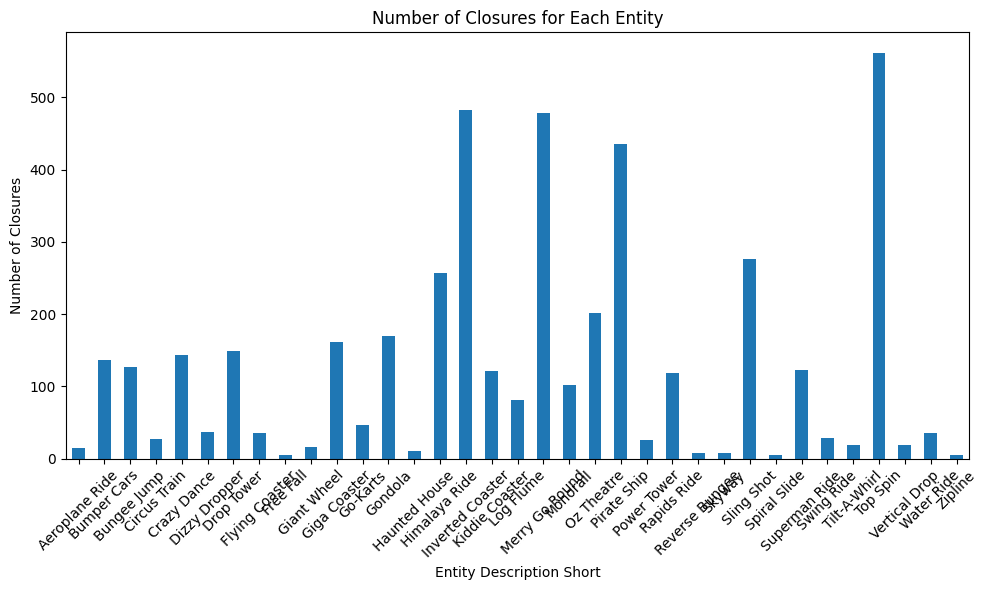

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'closure_counts' contains the count of non-NaN 'REF_CLOSING_DESCRIPTION' for each 'ENTITY_DESCRIPTION_SHORT'
closure_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Closures for Each Entity')
plt.xlabel('Entity Description Short')
plt.ylabel('Number of Closures')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels

plt.show()

# Analysis of Attendance

In [ ]:
attendance_df.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [ ]:

"""Here we observe that we might have some incorrect info with negative attendance hence we will have to do some data cleaning
"""

'Here we observe that we might have some incorrect info with negative attendance hence we will have to do some data cleaning\n'

In [ ]:
attendance_df.min()


USAGE_DATE               2018-06-01
FACILITY_NAME    PortAventura World
attendance                    -9991
dtype: object

In [ ]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     2367 non-null   object
 1   FACILITY_NAME  2367 non-null   object
 2   attendance     2367 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [ ]:
attendance_df.describe()

,attendance
count,2367.000000
mean,26008.374736
std,16952.262456
min,-9991.000000
25%,13373.000000
50%,23376.000000
75%,36127.500000
max,80642.000000


In [ ]:
# Investigate the anomalous negative attendance records
negative_attendance = attendance_df[attendance_df['attendance'] < 0]

# For the purpose of trend analysis, we'll exclude the anomalous records
# But first, let's see how many such records exist
negative_attendance_count = negative_attendance.shape[0]

# Assuming we proceed with excluding these records for further analysis
attendance_df_cleaned = attendance_df[attendance_df['attendance'] >= 0]

# Analyzing attendance trends over time for the entire dataset
# We'll group by date and calculate the mean attendance per day for a general trend
daily_mean_attendance = attendance_df_cleaned.groupby('USAGE_DATE')['attendance'].mean().reset_index()

# For comparing attendance between facilities
# We'll calculate the mean attendance per facility over the entire period
mean_attendance_by_facility = attendance_df_cleaned.groupby('FACILITY_NAME')['attendance'].mean().reset_index()

negative_attendance_count, negative_attendance, daily_mean_attendance.head(), mean_attendance_by_facility


(83,
       USAGE_DATE       FACILITY_NAME  attendance
 1304  2020-07-08  PortAventura World       -9914
 1305  2020-07-09      Tivoli Gardens       -6084
 1306  2020-07-10  PortAventura World       -9959
 1307  2020-07-10      Tivoli Gardens       -6102
 1308  2020-07-11  PortAventura World       -4108
 ...          ...                 ...         ...
 1548  2021-06-11      Tivoli Gardens       -6104
 1549  2021-06-12  PortAventura World       -9944
 1550  2021-06-13  PortAventura World       -9987
 1551  2021-06-13      Tivoli Gardens       -6098
 1552  2021-06-14  PortAventura World       -9955
 
 [83 rows x 3 columns],
    USAGE_DATE  attendance
 0  2018-06-01     33612.0
 1  2018-06-02     43525.0
 2  2018-06-03     34046.0
 3  2018-06-04     26366.0
 4  2018-06-05     24405.5,
         FACILITY_NAME    attendance
 0  PortAventura World  36068.749345
 1      Tivoli Gardens  18045.898156)

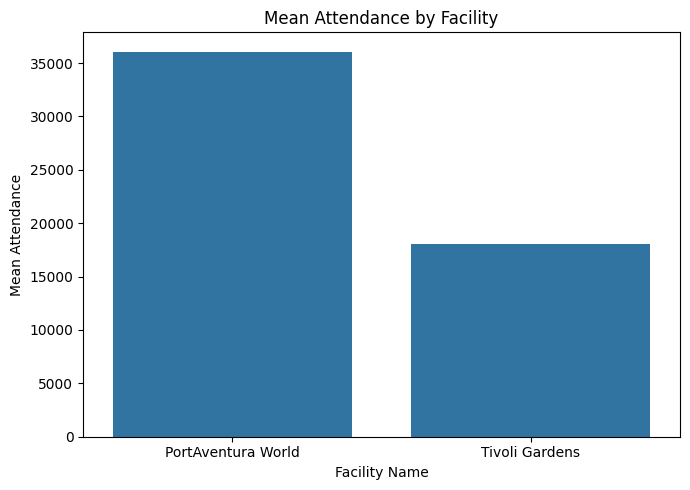

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot 2: Facility Comparison
plt.figure(figsize=(7, 5))
sns.barplot(data=mean_attendance_by_facility, x='FACILITY_NAME', y='attendance')
plt.title('Mean Attendance by Facility')
plt.xlabel('Facility Name')
plt.ylabel('Mean Attendance')
plt.tight_layout()

plt.show()


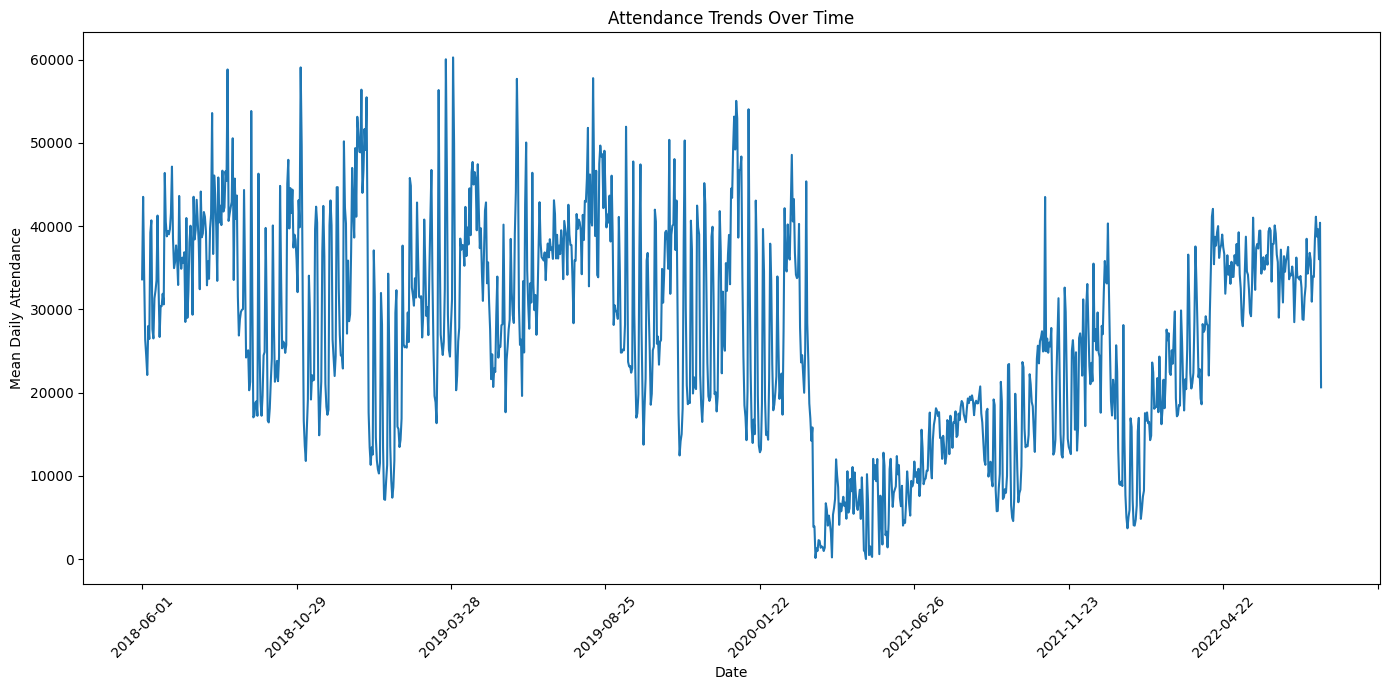

In [ ]:
# Adjusting the plot for better date label visibility
plt.figure(figsize=(14, 7))

# Plotting the trend
sns.lineplot(data=daily_mean_attendance, x='USAGE_DATE', y='attendance')
plt.title('Attendance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Daily Attendance')

# Adjusting x-axis to show fewer date labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show a maximum of 10 date labels
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The sudden dip in attendance in 2019 and 2020 can be explained due to COVID-19

# md1

In [11]:
import pandas as pd
waiting_df['WORK_DATE'] = waiting_df['WORK_DATE'].astype(str)
waiting_df['DEB_TIME_HOUR'] = waiting_df['DEB_TIME_HOUR'].astype(str).str.zfill(2)
waiting_df['DEB_TIME'] = waiting_df['DEB_TIME'].astype(str).str.zfill(2)
waiting_df['TIMESTAMP'] = pd.to_datetime(
    waiting_df['WORK_DATE'] + ' ' +
    waiting_df['DEB_TIME_HOUR'] + ':' +
    waiting_df['DEB_TIME'],
    errors='coerce',
    utc=True
)


waiting_df = waiting_df.dropna(subset=['TIMESTAMP'])

waiting_df['TIMESTAMP'] = waiting_df['TIMESTAMP'].dt.tz_convert(None)
waiting_df['TIMESTAMP']


<ipython-input-11-85a2c927b50c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waiting_df['TIMESTAMP'] = waiting_df['TIMESTAMP'].dt.tz_convert(None)


0         2018-01-01 22:00:00
1         2018-01-01 20:30:00
2         2018-01-01 23:30:00
3         2018-01-01 13:45:00
4         2018-01-01 18:00:00
                  ...        
3509319   2022-08-19 12:45:00
3509320   2022-08-19 04:15:00
3509321   2022-08-19 03:15:00
3509322   2022-08-19 14:30:00
3509323   2022-08-19 04:45:00
Name: TIMESTAMP, Length: 2662268, dtype: datetime64[ns]

In [12]:

waiting_df['TIMESTAMP'] = pd.to_datetime(waiting_df['TIMESTAMP'])
waiting_df_sorted = waiting_df.sort_values(by='TIMESTAMP')
waiting_df_sorted = waiting_df_sorted.reset_index(drop=True)

<ipython-input-12-8c56a904805a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waiting_df['TIMESTAMP'] = pd.to_datetime(waiting_df['TIMESTAMP'])


In [13]:


import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

roller_coaster_df = waiting_df_sorted[waiting_df_sorted['ENTITY_DESCRIPTION_SHORT'] == 'Roller Coaster'].tail(2000)

train_data = roller_coaster_df['WAIT_TIME_MAX'].iloc[:-18]

test_data = roller_coaster_df['WAIT_TIME_MAX'].iloc[-18:]


sarimax_model = SARIMAX(
    train_data,
    order=(1, 1, 1),  # (p, d, q)参数
    seasonal_order=(1, 1, 1, 72)  # (P, D, Q, s)参数
)

sarimax_result = sarimax_model.fit(disp=True)


forecast = sarimax_result.get_forecast(steps=18)

predicted_wait_times = forecast.predicted_mean

mse = mean_squared_error(test_data, predicted_wait_times)

print(f"MSE: {mse}")
mae = mean_absolute_error(test_data, predicted_wait_times)
print(f"MAE: {mae}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE: 11.193829389423549
MAE: 2.9022404442533887


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
print(sarimax_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      WAIT_TIME_MAX   No. Observations:                 1982
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 72)   Log Likelihood               -7193.705
Date:                            Thu, 22 Feb 2024   AIC                          14397.409
Time:                                    15:15:39   BIC                          14425.181
Sample:                                         0   HQIC                         14407.630
                                           - 1982                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6172      0.125      4.946      0.000       0.373       0.862
ma.L1         -0.6949      0.114   

In [21]:

start_time = '2022-08-24 09:15:00'
frequency = '15T'
periods = 48

future_times = pd.date_range(start=start_time, periods=periods, freq=frequency)

forecast_next = sarimax_result.get_forecast(steps=48)


processed_predicted_wait_times = np.maximum(predicted_next_wait_times, 0).round()


predicted_next_df = pd.DataFrame({
    'Time': future_times,
    'Predicted Wait Times': processed_predicted_wait_times
})


print(predicted_next_df)


                    Time  Predicted Wait Times
1982 2022-08-24 09:15:00                   2.0
1983 2022-08-24 09:30:00                   2.0
1984 2022-08-24 09:45:00                   0.0
1985 2022-08-24 10:00:00                   0.0
1986 2022-08-24 10:15:00                   0.0
1987 2022-08-24 10:30:00                   0.0
1988 2022-08-24 10:45:00                   1.0
1989 2022-08-24 11:00:00                   5.0
1990 2022-08-24 11:15:00                   4.0
1991 2022-08-24 11:30:00                   1.0
1992 2022-08-24 11:45:00                   0.0
1993 2022-08-24 12:00:00                   1.0
1994 2022-08-24 12:15:00                   0.0
1995 2022-08-24 12:30:00                   0.0
1996 2022-08-24 12:45:00                   5.0
1997 2022-08-24 13:00:00                   5.0
1998 2022-08-24 13:15:00                   5.0
1999 2022-08-24 13:30:00                   2.0
2000 2022-08-24 13:45:00                   1.0
2001 2022-08-24 14:00:00                   0.0
2002 2022-08-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
